In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import io


final =  pd.read_csv('gdrive/My Drive/CSV/final_cleaned.csv')
final.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,New
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,everi book educ,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educwitti littl book make son laugh...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,whole seri great way spend time child,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,whole seri great way spend time childrememb se...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,entertainingl funni,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...,entertainingl funnibeetlejuic well written mov...
3,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,modern day fairi tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...,modern day fairi taletwist rumplestiskin captu...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,fantast,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,fantastbeetlejuic excel funni movi keaton hila...


In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
final['Score'].value_counts()

 1    307061
-1     57110
Name: Score, dtype: int64

In [5]:
final.Score.replace(to_replace= -1, value=0, inplace=True)
final['Score'].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [6]:
final.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,New
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,everi book educ,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educwitti littl book make son laugh...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,whole seri great way spend time child,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,whole seri great way spend time childrememb se...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,entertainingl funni,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...,entertainingl funnibeetlejuic well written mov...
3,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,modern day fairi tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...,modern day fairi taletwist rumplestiskin captu...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,fantast,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,fantastbeetlejuic excel funni movi keaton hila...


In [74]:
final = final[0:5000] #taking the first 5k reviews
len(final)

5000

In [75]:
z = final['New'].values
z

array(['everi book educwitti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'whole seri great way spend time childrememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live',
       'entertainingl funnibeetlejuic well written movi everyth excel act special effect delight chose view movi',
       ...,
       'must season kitchenfirst tri vegeta hear visit eastern europ late sinc becom kitchen stapl use vegeta make soup stew chicken veal marsala piccata vegeta use season rice pasta sinc made veget use enrich flavor vegetarian thanksgiv stuf vegeta also use enhanc sauc gravi havent tri vegeta urg believ wide use across europ',
       'year old eat veggiyear old hate lettuc purchas aerogarden watch leav grow alway ask l

In [76]:
from nltk import FreqDist

#https://stackoverflow.com/questions/41699065/create-vocabulary-dictionary-for-text-mining


train_set = final["New"]
word_dist = FreqDist()
for s in train_set:
    word_dist.update(s.split())

word_dist = dict(word_dist)
word_dist

{'everi': 334,
 'book': 91,
 'educwitti': 1,
 'littl': 792,
 'make': 1440,
 'son': 87,
 'laugh': 24,
 'loud': 5,
 'recit': 2,
 'car': 31,
 'drive': 31,
 'along': 91,
 'alway': 323,
 'sing': 15,
 'refrain': 2,
 'hes': 43,
 'learn': 52,
 'whale': 2,
 'india': 25,
 'droop': 3,
 'love': 1291,
 'new': 296,
 'word': 81,
 'introduc': 52,
 'silli': 10,
 'classic': 82,
 'will': 22,
 'bet': 14,
 'still': 416,
 'abl': 138,
 'memori': 41,
 'colleg': 26,
 'whole': 314,
 'seri': 7,
 'great': 1718,
 'way': 487,
 'spend': 44,
 'time': 926,
 'childrememb': 1,
 'see': 290,
 'show': 81,
 'air': 43,
 'televis': 7,
 'year': 601,
 'ago': 167,
 'child': 72,
 'sister': 22,
 'later': 88,
 'bought': 264,
 'day': 630,
 'thirti': 6,
 'someth': 297,
 'use': 1634,
 'song': 14,
 'student': 25,
 'teach': 12,
 'preschool': 2,
 'turn': 156,
 'school': 53,
 'purchas': 257,
 'children': 80,
 'tradit': 133,
 'live': 211,
 'entertainingl': 1,
 'funnibeetlejuic': 1,
 'well': 721,
 'written': 16,
 'movi': 161,
 'everyth': 12

In [77]:
type(word_dist)

dict

In [78]:
import operator
word_dist = sorted(word_dist.items(), key=operator.itemgetter(1),reverse = True)
word_dist

[('tea', 2662),
 ('tast', 2442),
 ('like', 2392),
 ('flavor', 1996),
 ('good', 1871),
 ('one', 1738),
 ('great', 1718),
 ('use', 1634),
 ('tri', 1511),
 ('make', 1440),
 ('product', 1395),
 ('love', 1291),
 ('coffe', 1247),
 ('get', 1243),
 ('best', 1192),
 ('eat', 1024),
 ('also', 964),
 ('time', 926),
 ('food', 924),
 ('chocol', 913),
 ('realli', 874),
 ('would', 858),
 ('dont', 806),
 ('even', 800),
 ('buy', 799),
 ('littl', 792),
 ('find', 784),
 ('well', 721),
 ('much', 717),
 ('box', 698),
 ('better', 688),
 ('bag', 639),
 ('sweet', 635),
 ('day', 630),
 ('order', 620),
 ('sugar', 615),
 ('ive', 608),
 ('drink', 605),
 ('year', 601),
 ('cat', 594),
 ('hot', 592),
 ('mix', 586),
 ('cup', 585),
 ('sauc', 557),
 ('high', 554),
 ('store', 551),
 ('bar', 550),
 ('amazon', 549),
 ('recommend', 545),
 ('first', 545),
 ('made', 529),
 ('look', 528),
 ('packag', 526),
 ('want', 520),
 ('chees', 517),
 ('think', 515),
 ('water', 513),
 ('delici', 513),
 ('found', 506),
 ('favorit', 504),
 

In [79]:
type(word_dist)

list

In [80]:
word_dist[:15]

[('tea', 2662),
 ('tast', 2442),
 ('like', 2392),
 ('flavor', 1996),
 ('good', 1871),
 ('one', 1738),
 ('great', 1718),
 ('use', 1634),
 ('tri', 1511),
 ('make', 1440),
 ('product', 1395),
 ('love', 1291),
 ('coffe', 1247),
 ('get', 1243),
 ('best', 1192)]

In [0]:
#https://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python


'''a={}
  rank=1
  for num in sorted(vector):
    if num not in a:
      a[num]=rank
      rank=rank+1 '''

a = {}
rank = 1
for num in range(len(word_dist)):
    i = word_dist[num][0]
    a[i] = rank
    rank+=1

In [0]:
X = []
for sent in z:
    rows = []
    for word in sent.split():
        rows.append(a[word])
    X.append(rows)

In [0]:
#X[:20]

In [97]:
X = np.array(X)
X

array([list([110, 527, 7190, 26, 527, 10, 550, 1438, 3537, 5395, 1229, 1230, 528, 113, 1943, 5396, 985, 837, 5397, 1412, 4472, 12, 130, 582, 527, 838, 2450, 570, 527, 1520, 2009, 550, 85, 335, 5395, 1016, 1376]),
       list([119, 2983, 7, 63, 961, 18, 7191, 133, 583, 986, 2984, 39, 280, 647, 1521, 543, 155, 34, 3240, 129, 8, 2983, 527, 2010, 1413, 2192, 5398, 297, 119, 831, 159, 528, 527, 589, 346, 219]),
       list([7192, 7193, 28, 1861, 288, 376, 88, 1350, 308, 433, 540, 3241, 2011, 288]),
       ...,
       list([252, 265, 16038, 9, 3909, 990, 746, 2561, 1214, 1210, 64, 385, 818, 1167, 8, 3909, 10, 283, 2079, 156, 5027, 16039, 16040, 3909, 8, 265, 178, 223, 64, 51, 536, 8, 3861, 4, 1129, 4201, 1560, 3909, 17, 8, 1008, 44, 1423, 567, 9, 3909, 3286, 363, 1243, 8, 1021, 1214]),
       list([39, 188, 16, 16041, 188, 852, 1815, 159, 2304, 468, 174, 629, 113, 408, 1815, 396, 216, 14, 16, 312, 12, 87, 174, 856, 174, 204, 1815, 414, 4396, 249, 85, 7, 52, 479, 480, 17, 7, 157, 757, 630, 48

In [98]:
Y = final['Score']
Y = np.array(Y)
Y

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0,shuffle = False)

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import warnings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [104]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(4000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0

In [0]:
top_words = 6000
epochs = 20
batch_size = 64
embedding_vecor_length = 32

In [0]:
from keras.layers.normalization import BatchNormalization

In [0]:
from datetime import datetime

# Architecture-1

In [122]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(2, return_sequences=True))
model.add(LSTM(2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 600, 32)           192000    
_________________________________________________________________
lstm_51 (LSTM)               (None, 600, 2)            280       
_________________________________________________________________
lstm_52 (LSTM)               (None, 2)                 40        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 3         
Total params: 192,323
Trainable params: 192,323
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
start = datetime.now()


history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))




Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 178s 45ms/step - loss: 0.6351 - acc: 0.8855 - val_loss: 0.5737 - val_acc: 0.8640
Epoch 2/10
4000/4000 [==============================] - 172s 43ms/step - loss: 0.5241 - acc: 0.8895 - val_loss: 0.5071 - val_acc: 0.8640
Epoch 3/10
4000/4000 [==============================] - 175s 44ms/step - loss: 0.4677 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 4/10
4000/4000 [==============================] - 178s 45ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 5/10
4000/4000 [==============================] - 186s 46ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 6/10
4000/4000 [==============================] - 174s 44ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 7/10
4000/4000 [==============================] - 176s 44ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 

Time taken to run this cell : 0:30:12.316704


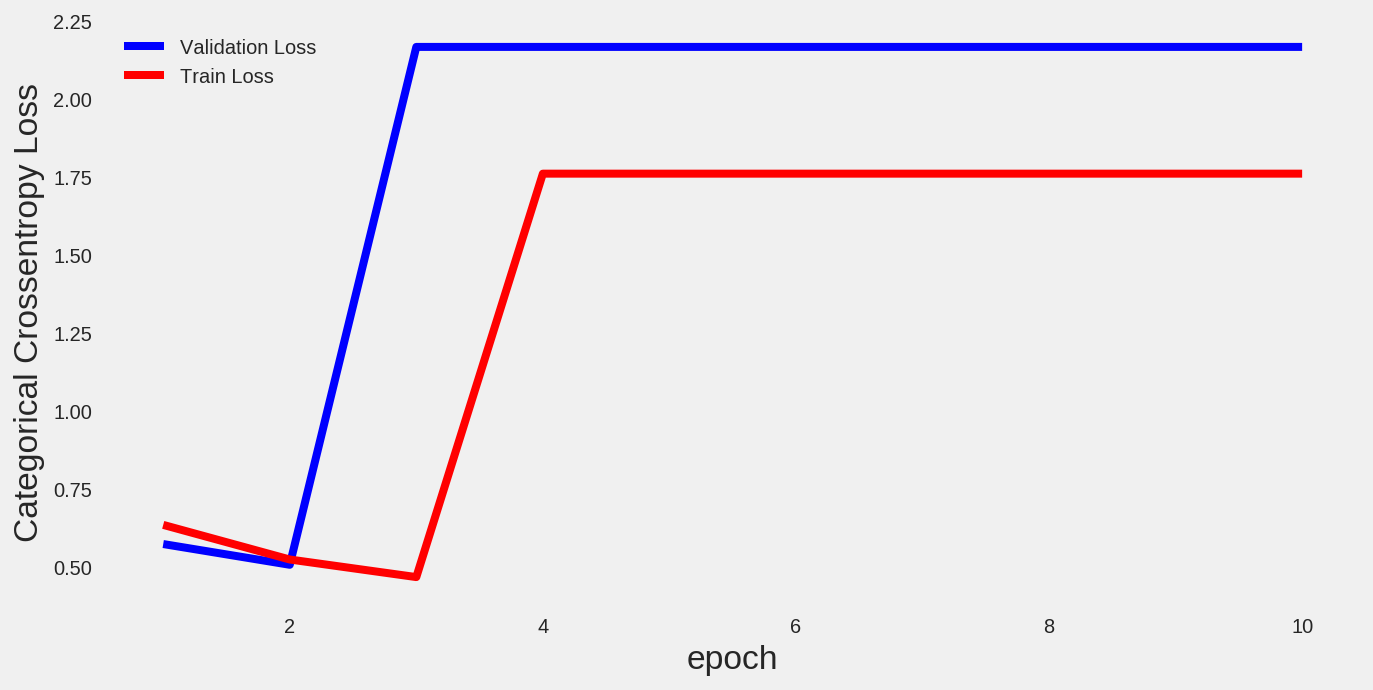

In [124]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,11))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


print('Time taken to run this cell :', datetime.now() - start)

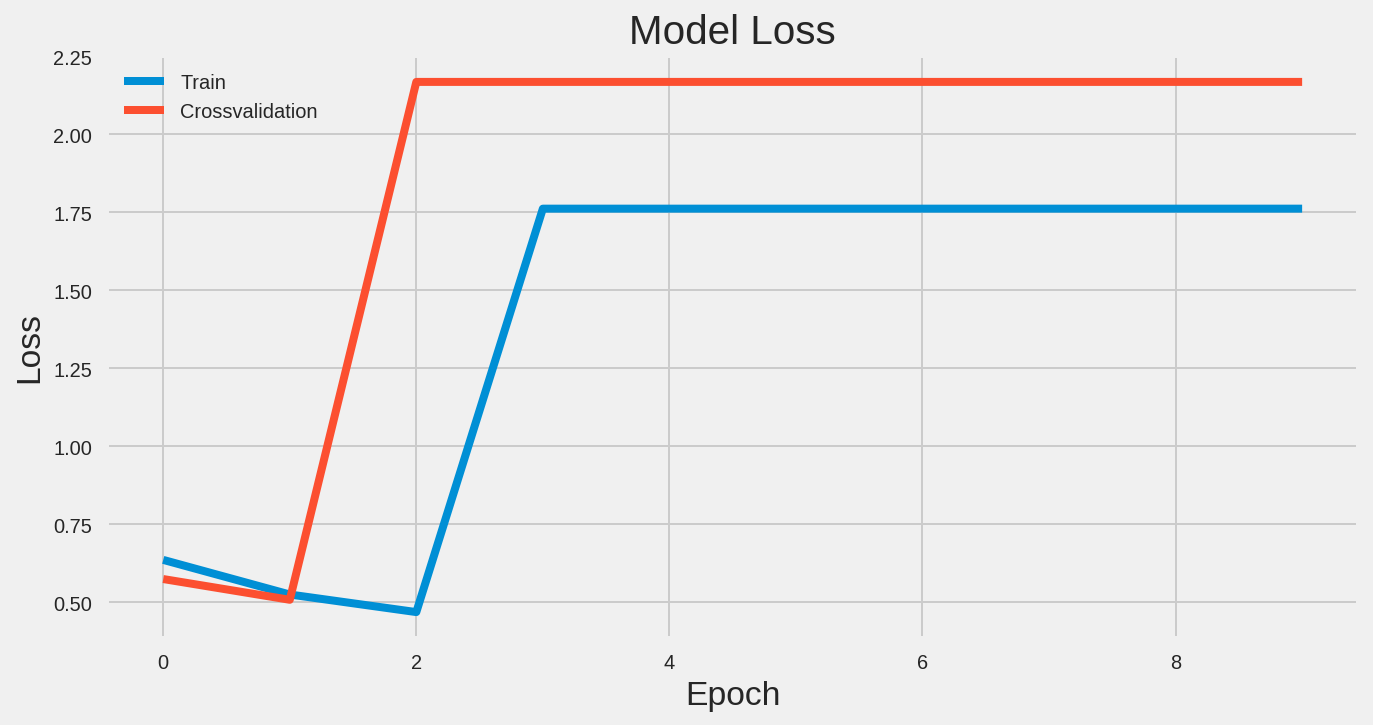

In [125]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper left')
plt.show()

# Architecture-2

In [126]:
from keras.layers.normalization import BatchNormalization


# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(BatchNormalization())
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 600, 64)           384000    
_________________________________________________________________
batch_normalization_37 (Batc (None, 600, 64)           256       
_________________________________________________________________
lstm_53 (LSTM)               (None, 600, 100)          66000     
_________________________________________________________________
dropout_40 (Dropout)         (None, 600, 100)          0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 600, 100)          400       
_________________________________________________________________
lstm_54 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)               0         
__________

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 171s 43ms/step - loss: 0.1379 - acc: 0.9490 - val_loss: 0.3757 - val_acc: 0.8620
Epoch 2/10
4000/4000 [==============================] - 176s 44ms/step - loss: 0.1352 - acc: 0.9510 - val_loss: 0.4866 - val_acc: 0.8810
Epoch 3/10
4000/4000 [==============================] - 183s 46ms/step - loss: 0.0831 - acc: 0.9698 - val_loss: 0.4728 - val_acc: 0.8840
Epoch 4/10
4000/4000 [==============================] - 174s 44ms/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.5302 - val_acc: 0.8510
Epoch 5/10
4000/4000 [==============================] - 176s 44ms/step - loss: 0.0365 - acc: 0.9875 - val_loss: 0.6105 - val_acc: 0.8760
Epoch 6/10
4000/4000 [==============================] - 176s 44ms/step - loss: 0.0551 - acc: 0.9800 - val_loss: 0.4866 - val_acc: 0.8710
Epoch 7/10
4000/4000 [==============================] - 182s 46ms/step - loss: 0.0496 - acc: 0.9840 - val_loss: 0.5046 - val_acc: 

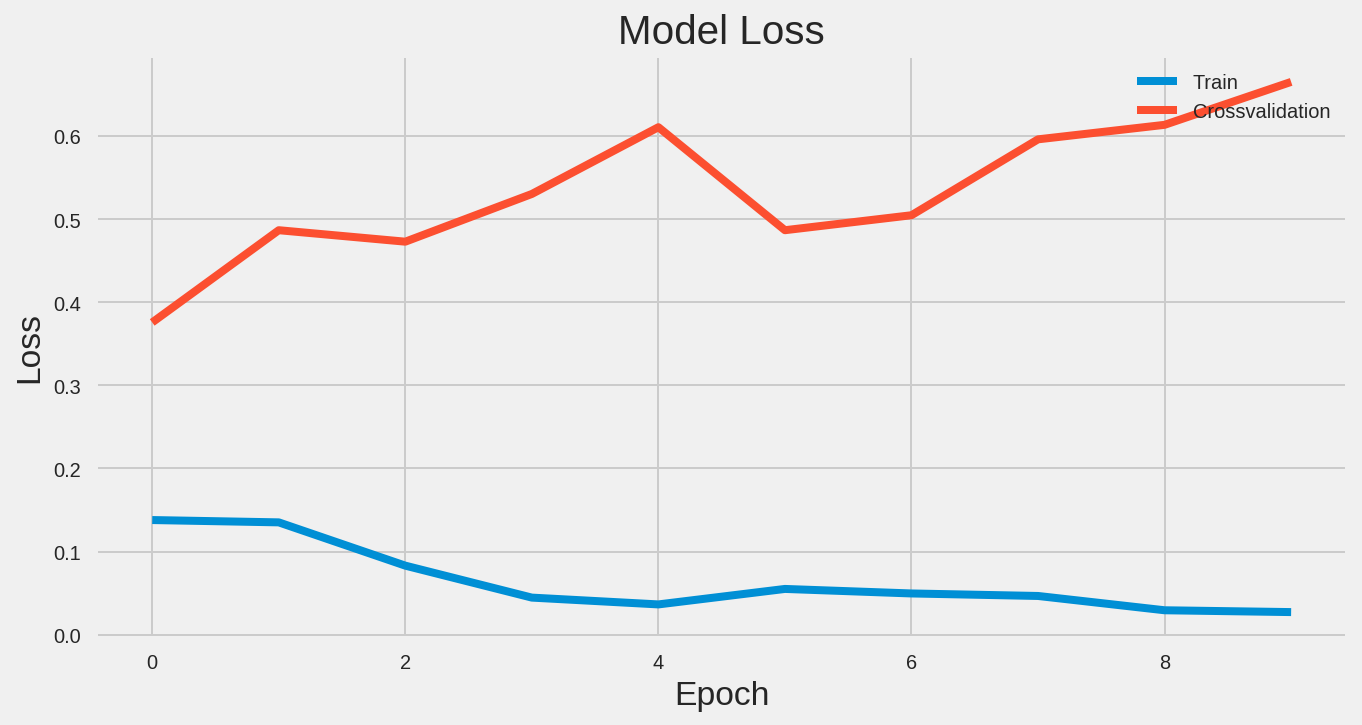

Time taken to run this cell : 0:30:12.283487


In [129]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'], loc='upper right')
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Architecture-3

In [130]:
# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(BatchNormalization())
model.add(LSTM(2, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(2))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 600, 64)           384000    
_________________________________________________________________
batch_normalization_39 (Batc (None, 600, 64)           256       
_________________________________________________________________
lstm_55 (LSTM)               (None, 600, 2)            536       
_________________________________________________________________
batch_normalization_40 (Batc (None, 600, 2)            8         
_________________________________________________________________
lstm_56 (LSTM)               (None, 2)                 40        
_________________________________________________________________
dropout_42 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 3         
Total para

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 181s 45ms/step - loss: 0.5411 - acc: 0.7970 - val_loss: 0.4908 - val_acc: 0.8640
Epoch 2/10
4000/4000 [==============================] - 169s 42ms/step - loss: 0.4744 - acc: 0.8895 - val_loss: 0.4633 - val_acc: 0.8640
Epoch 3/10
4000/4000 [==============================] - 168s 42ms/step - loss: 0.4495 - acc: 0.8895 - val_loss: 0.4483 - val_acc: 0.8640
Epoch 4/10
4000/4000 [==============================] - 168s 42ms/step - loss: 0.4335 - acc: 0.8895 - val_loss: 0.4300 - val_acc: 0.8640
Epoch 5/10
4000/4000 [==============================] - 169s 42ms/step - loss: 0.4036 - acc: 0.8895 - val_loss: 0.4124 - val_acc: 0.8640
Epoch 6/10
4000/4000 [==============================] - 170s 42ms/step - loss: 0.3771 - acc: 0.8895 - val_loss: 0.3957 - val_acc: 0.8640
Epoch 7/10
4000/4000 [==============================] - 169s 42ms/step - loss: 0.3482 - acc: 0.8900 - val_loss: 0.3837 - val_acc: 

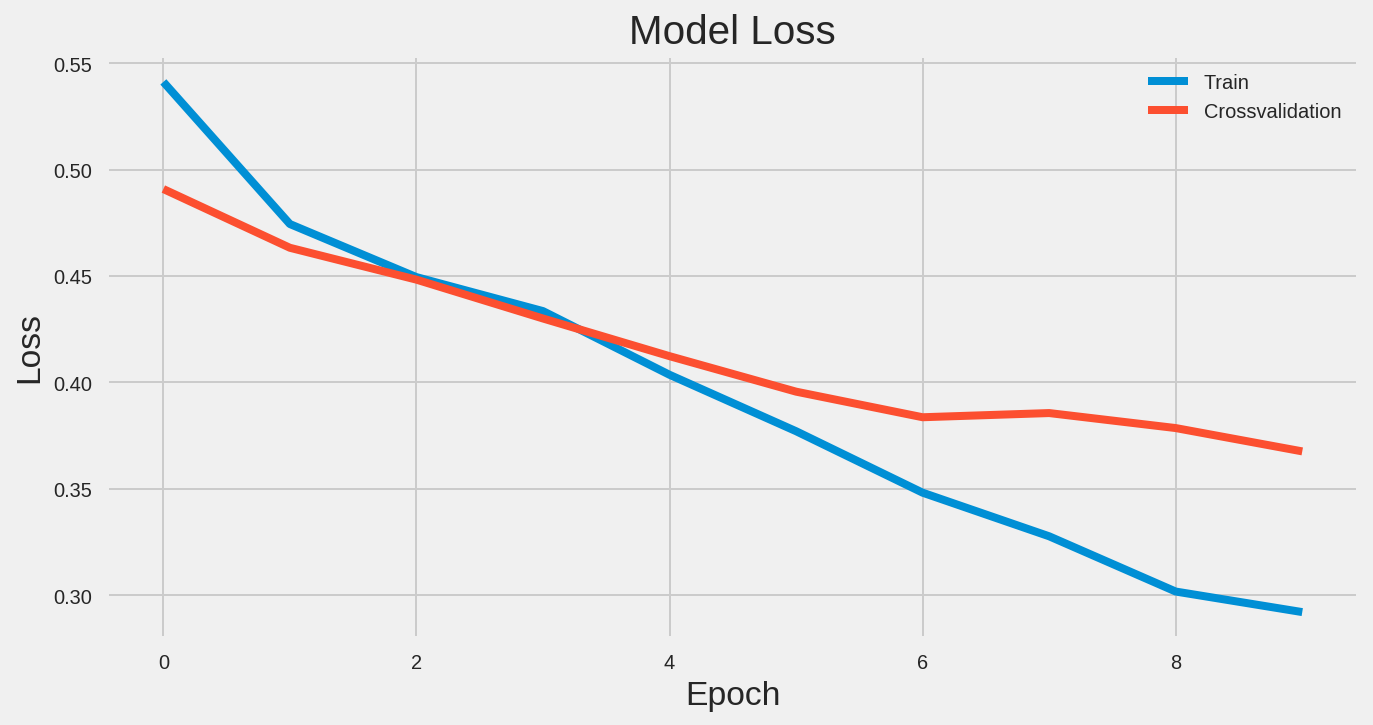

Time taken to run this cell : 0:28:58.181136


In [131]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'])
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Architecture-4

In [136]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 600, 32)           192000    
_________________________________________________________________
lstm_59 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_45 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 100s 25ms/step - loss: 0.3988 - acc: 0.8812 - val_loss: 0.3843 - val_acc: 0.8640
Epoch 2/10
4000/4000 [==============================] - 88s 22ms/step - loss: 1.7287 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 3/10
4000/4000 [==============================] - 87s 22ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 4/10
4000/4000 [==============================] - 88s 22ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 5/10
4000/4000 [==============================] - 90s 23ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 6/10
4000/4000 [==============================] - 91s 23ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640
Epoch 7/10
4000/4000 [==============================] - 90s 23ms/step - loss: 1.7616 - acc: 0.8895 - val_loss: 2.1682 - val_acc: 0.8640

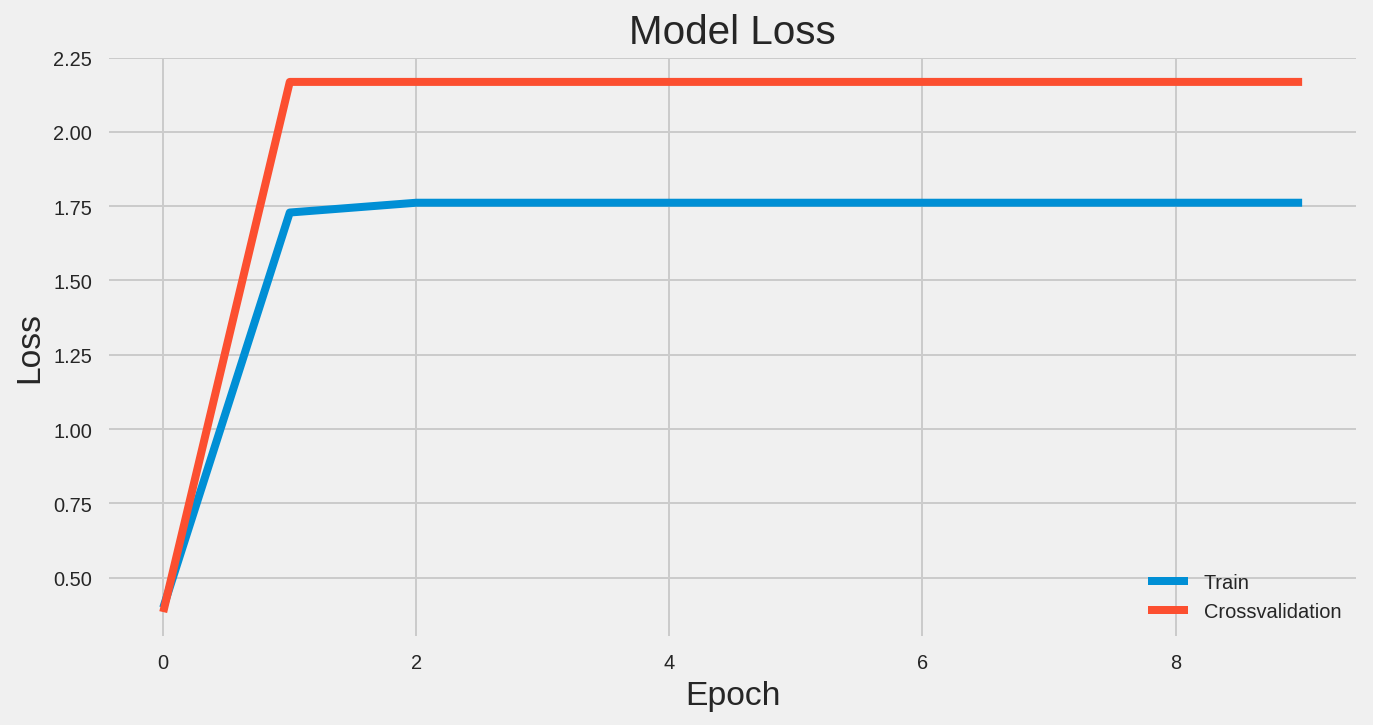

Time taken to run this cell : 0:15:33.636212


In [137]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'])
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Architecture-5

In [149]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(10,return_sequences=True,dropout=0.5,recurrent_dropout=0.5))
model.add(LSTM(10,dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 600, 32)           192000    
_________________________________________________________________
lstm_71 (LSTM)               (None, 600, 10)           1720      
_________________________________________________________________
lstm_72 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 194,571
Trainable params: 194,571
Non-trainable params: 0
_________________________________________________________________
None


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 216s 54ms/step - loss: 0.5445 - acc: 0.8738 - val_loss: 0.3943 - val_acc: 0.8640
Epoch 2/10
4000/4000 [==============================] - 199s 50ms/step - loss: 0.3490 - acc: 0.8892 - val_loss: 0.4105 - val_acc: 0.8640
Epoch 3/10
4000/4000 [==============================] - 196s 49ms/step - loss: 0.3330 - acc: 0.8895 - val_loss: 0.3932 - val_acc: 0.8640
Epoch 4/10
4000/4000 [==============================] - 193s 48ms/step - loss: 0.3144 - acc: 0.8900 - val_loss: 0.3665 - val_acc: 0.8690
Epoch 5/10
4000/4000 [==============================] - 192s 48ms/step - loss: 0.2662 - acc: 0.9008 - val_loss: 0.3734 - val_acc: 0.8680
Epoch 6/10
4000/4000 [==============================] - 194s 48ms/step - loss: 0.2406 - acc: 0.9113 - val_loss: 0.3701 - val_acc: 0.8690
Epoch 7/10
4000/4000 [==============================] - 191s 48ms/step - loss: 0.2164 - acc: 0.9248 - val_loss: 0.3909 - val_acc: 

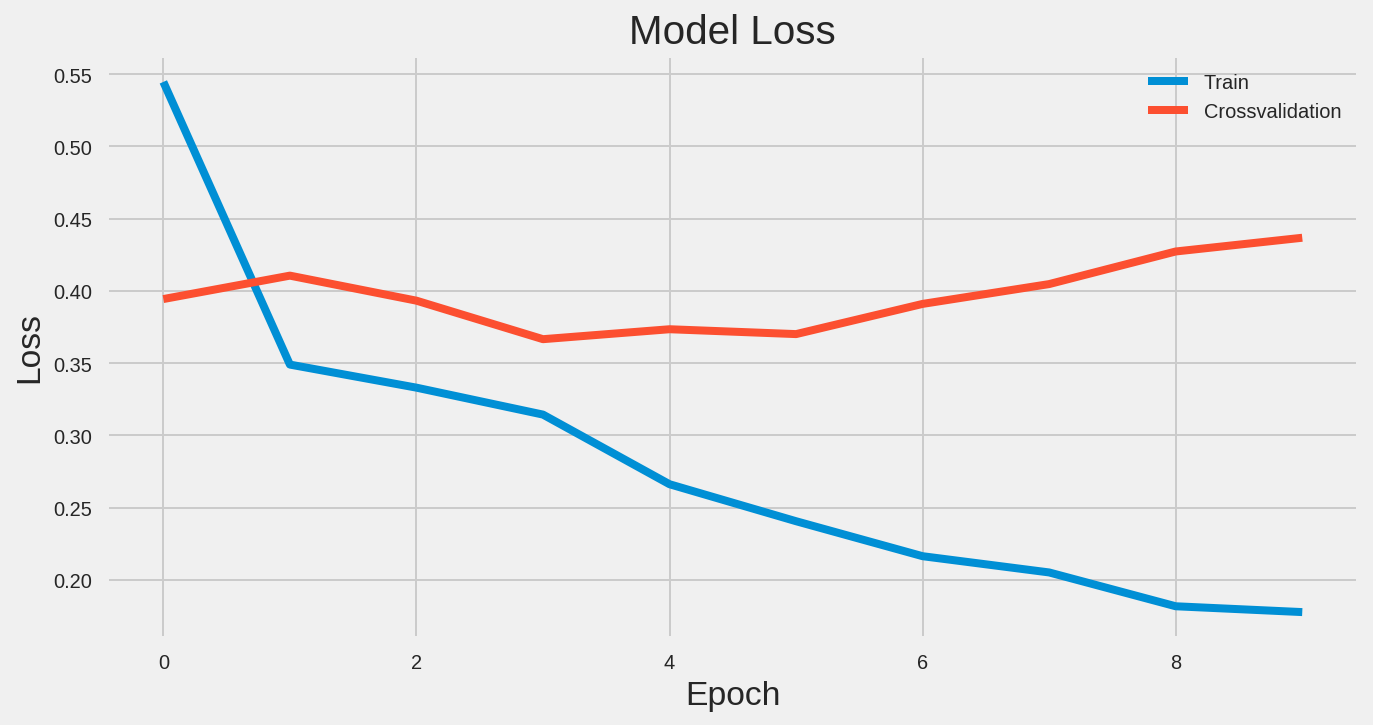

Time taken to run this cell : 0:33:14.242946


In [150]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'])
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Architecture-6

In [159]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(2,return_sequences=True,dropout=0.5,recurrent_dropout=0.5))
model.add(LSTM(2,dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 600, 64)           384000    
_________________________________________________________________
lstm_79 (LSTM)               (None, 600, 2)            536       
_________________________________________________________________
lstm_80 (LSTM)               (None, 2)                 40        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 3         
Total params: 384,579
Trainable params: 384,579
Non-trainable params: 0
_________________________________________________________________
None


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 211s 53ms/step - loss: 0.6429 - acc: 0.8550 - val_loss: 0.5844 - val_acc: 0.8640
Epoch 2/10
4000/4000 [==============================] - 192s 48ms/step - loss: 0.5350 - acc: 0.8870 - val_loss: 0.4606 - val_acc: 0.8640
Epoch 3/10
4000/4000 [==============================] - 194s 48ms/step - loss: 0.4388 - acc: 0.8892 - val_loss: 0.4126 - val_acc: 0.8640
Epoch 4/10
4000/4000 [==============================] - 194s 48ms/step - loss: 0.3829 - acc: 0.8895 - val_loss: 0.4006 - val_acc: 0.8640
Epoch 5/10
4000/4000 [==============================] - 193s 48ms/step - loss: 0.3684 - acc: 0.8898 - val_loss: 0.3960 - val_acc: 0.8640
Epoch 6/10
4000/4000 [==============================] - 196s 49ms/step - loss: 0.3565 - acc: 0.8895 - val_loss: 0.3950 - val_acc: 0.8640
Epoch 7/10
4000/4000 [==============================] - 200s 50ms/step - loss: 0.3524 - acc: 0.8892 - val_loss: 0.3952 - val_acc: 

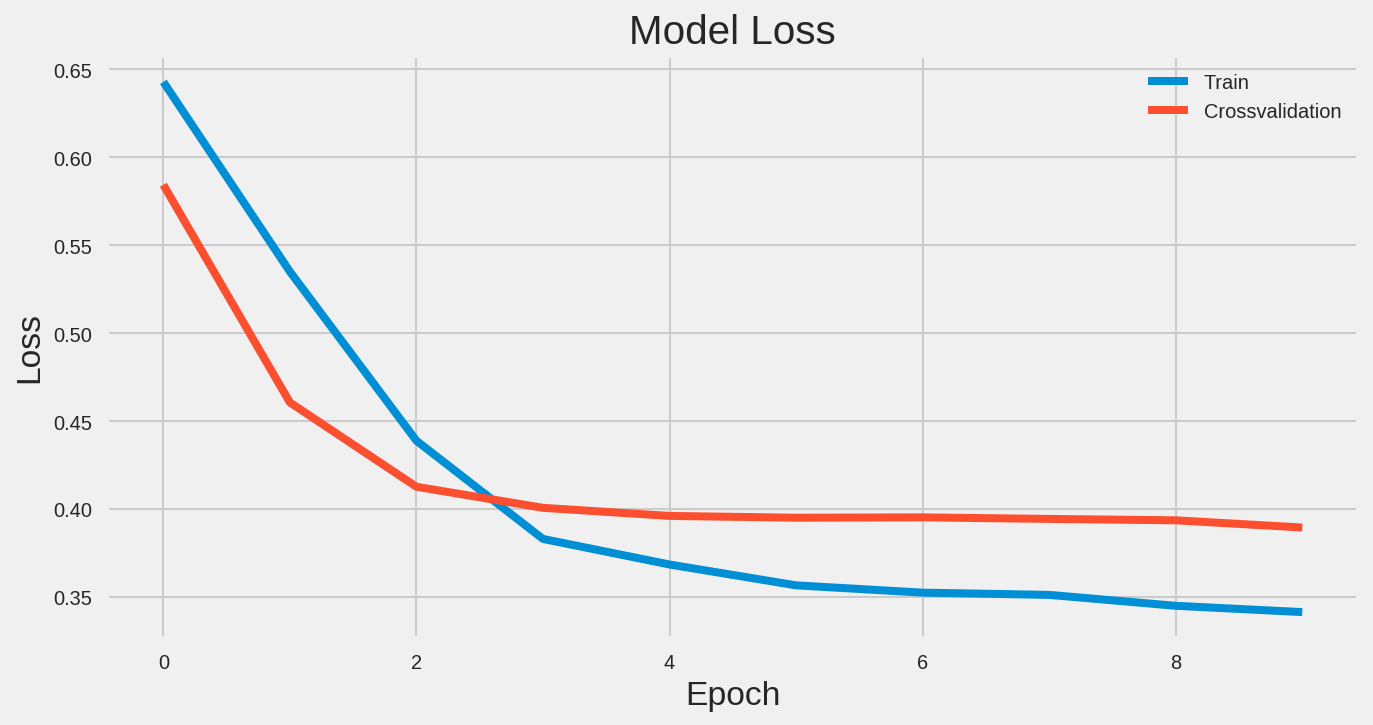

Time taken to run this cell : 0:33:45.448443


In [152]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'])
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Architecture-7 

**(Architecture-6 with 20 epochs.**)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 [==============================] - 215s 54ms/step - loss: 0.6373 - acc: 0.8725 - val_loss: 0.5740 - val_acc: 0.8640
Epoch 2/20
4000/4000 [==============================] - 199s 50ms/step - loss: 0.5132 - acc: 0.8895 - val_loss: 0.4425 - val_acc: 0.8640
Epoch 3/20
4000/4000 [==============================] - 200s 50ms/step - loss: 0.4190 - acc: 0.8895 - val_loss: 0.3988 - val_acc: 0.8640
Epoch 4/20
4000/4000 [==============================] - 201s 50ms/step - loss: 0.3635 - acc: 0.8895 - val_loss: 0.3929 - val_acc: 0.8640
Epoch 5/20
4000/4000 [==============================] - 203s 51ms/step - loss: 0.3535 - acc: 0.8895 - val_loss: 0.3922 - val_acc: 0.8640
Epoch 6/20
4000/4000 [==============================] - 204s 51ms/step - loss: 0.3456 - acc: 0.8895 - val_loss: 0.3839 - val_acc: 0.8640
Epoch 7/20
4000/4000 [==============================] - 207s 52ms/step - loss: 0.3274 - acc: 0.8898 - val_loss: 0.3680 - val_acc: 

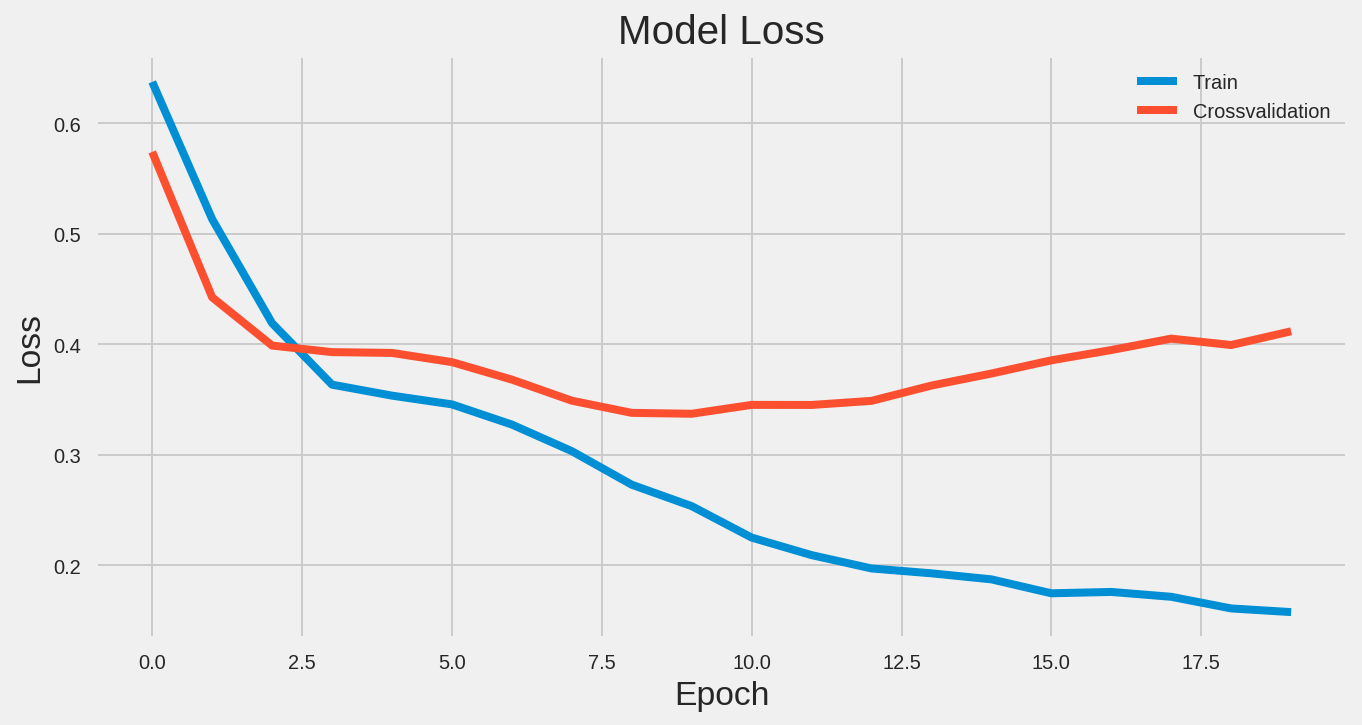

Time taken to run this cell : 1:07:04.966635


In [161]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = 20, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))



plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Crossvalidation'])
plt.show()
print('Time taken to run this cell :', datetime.now() - start)

# Summary

_**As my previous models were overfitting highly, i decided to try different architechures. But due to time limitations, I had to do it with 5000 points only(Sorry!!!!!!...). Here is a ocmplete summary of the 7 architures that i used.**_

In [11]:
from prettytable import PrettyTable


x = PrettyTable()

x.field_names = ["S.R",'Architectures',"Training Loss","Test loss","Accuracy","Remarks"]

x.add_row([(1),"Architecture-1","1.716", 2.162, '86.40%', "Overfit"])
x.add_row([(2),"Architecture-2","0.0272", 0.9908, '88.40%', "Overfit"])
x.add_row([(3),'Architecture-3',"0.2922", 0.3676, '86.00%', "Good"])
x.add_row([(4),"Architecture-4","1.7616", 2.1682, '86.40%', "Overfit"])
x.add_row([(5),"Architecture-5","0.1777" , 0.4367, '86.70%',"Good"])
x.add_row([(6),'Architecture-6',"0.3413", 0.3894, '86.40%', "Very Good"])
x.add_row([(7),'Architecture-7(Architecture-6 with 20 epochs.)',"0.1578", 0.4117, '86.60%', "Good"])
print(x.get_string(title = "-----SUMMARY-----"))


+-----+------------------------------------------------+---------------+-----------+----------+-----------+
| S.R |                 Architectures                  | Training Loss | Test loss | Accuracy |  Remarks  |
+-----+------------------------------------------------+---------------+-----------+----------+-----------+
|  1  |                 Architecture-1                 |     1.716     |   2.162   |  86.40%  |  Overfit  |
|  2  |                 Architecture-2                 |     0.0272    |   0.9908  |  88.40%  |  Overfit  |
|  3  |                 Architecture-3                 |     0.2922    |   0.3676  |  86.00%  |    Good   |
|  4  |                 Architecture-4                 |     1.7616    |   2.1682  |  86.40%  |  Overfit  |
|  5  |                 Architecture-5                 |     0.1777    |   0.4367  |  86.70%  |    Good   |
|  6  |                 Architecture-6                 |     0.3413    |   0.3894  |  86.40%  | Very Good |
|  7  | Architecture-7(Archi